In [1]:
import cv2
import  numpy as np
import matplotlib.pyplot as plt

#均值哈希算法
def aHash(path):
    #缩放为8*8
    img=cv2.imread(path)
    img=cv2.resize(img,(8,8),interpolation=cv2.INTER_CUBIC)
    #转换为灰度图
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    #s为像素和初值为0，hash_str为hash值初值为''
    s=0
    hash_str=''
    #遍历累加求像素和
    for i in range(8):
        for j in range(8):
            s=s+gray[i,j]
    #求平均灰度
    avg=s/64
    #灰度大于平均值为1相反为0生成图片的hash值
    for i in range(8):
        for j in range(8):
            if  gray[i,j]>avg:
                hash_str=hash_str+'1'
            else:
                hash_str=hash_str+'0'            
    return hash_str

#差值感知算法
def dHash(path):
    #缩放8*8
    img=cv2.imread(path)
    img=cv2.resize(img,(9,8),interpolation=cv2.INTER_CUBIC)
    #转换灰度图
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    hash_str=''
    #每行前一个像素大于后一个像素为1，相反为0，生成哈希
    for i in range(8):
        for j in range(8):
            if   gray[i,j]>gray[i,j+1]:
                hash_str=hash_str+'1'
            else:
                hash_str=hash_str+'0'
    return hash_str
#感知哈希算法
def pHash(path):

    # Step1. 把图像缩小为8 * 8,并转化为灰度图
    src = cv2.imread(path, 0)
    src = cv2.resize(img,(8, 8),cv2.INTER_LINEAR)

    # Step2. 计算64个像素的灰度均值
    avg = sum([sum(src[i]) for i in range(8)]) / 64

    # Step3. 与平均值比较，生成01字符串
    string = ''
    for i in range(8):
        string += ''.join(map(lambda i: '0' if i < avg else '1', src[i]))

    # Step4. 计算hash值
    result = ''
    for i in range(0, 64, 4):
        result += ''.join('%x' % int(string[i: i + 4], 2))
    return result


def hamming(str1, str2):
    if len(str1) != len(str2):
        return
    count = 0
    for i in range(0, len(str1)):
        if str1[i] != str2[i]:
            count += 1
    return count

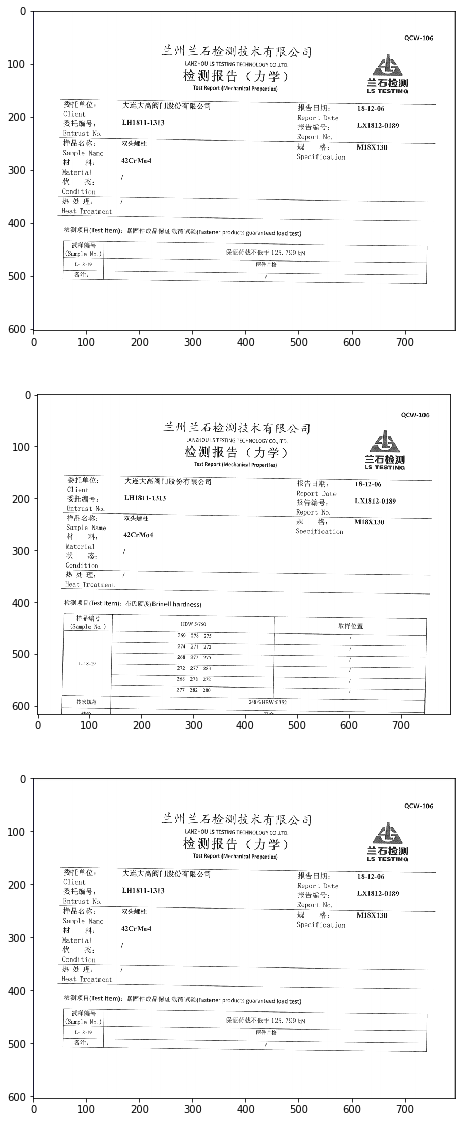

In [2]:
img1 = cv2.imread('./image/1.png')
img2 = cv2.imread('./image/2.png')
img5 = cv2.imread('./image/5.png')

plt.figure(figsize=(20,20))
plt.subplot(3,1,1)
plt.imshow(img1)
plt.subplot(3,1,2)
plt.imshow(img2)
plt.subplot(3,1,3)
plt.imshow(img5)
plt.show()

In [3]:
#提供三种图像相似度匹配算法 dHash PHash aHash
hash1= dHash('./image/1.png')
hash2= dHash('./image/2.png')
hash3= dHash('./image/5.png')
print(hash1)
print(hash2)
print(hash3)
n1=hamming(hash1,hash2)
n2=hamming(hash1,hash3)
print('计算图像的相似度，之越小越相似')
print('image1 与 image2 相似度：',n1)
print('image1 与 image5 相似度：',n2)

0000000000000000000000000000001000000000011000001000000000000000
0000000000100000000001000100000000000100100000000110000000000000
0000000000000000000000000000001000000000011000001000000000000000
计算图像的相似度，之越小越相似
image1 与 image2 相似度： 11
image1 与 image5 相似度： 0
